In [1]:
from sapsan.general.data.jhtdb_dataset import JHTDB128Dataset
from sapsan.general.estimator.cnn.spacial_3d_encoder import Spacial3dEncoderNetworkEstimator, Spacial3dEncoderNetworkEstimatorConfiguration
from sapsan.general.experiment import TrainingExperiment, EvaluationExperiment, FakeExperimentBackend

In [2]:
dataset_root_dir = "/Users/icekhan/Documents/development/myprojects/sapsan/repo/Sapsan/dataset"
GRID_SIZE = 32

In [3]:
training_experiment_name = "Training experiment"
estimator = Spacial3dEncoderNetworkEstimator(
    config=Spacial3dEncoderNetworkEstimatorConfiguration(n_epochs=1, grid_dim=GRID_SIZE)
)
x, y = JHTDB128Dataset(path=dataset_root_dir,
                       features=['u', 'b', 'a',
                                'du0', 'du1', 'du2',
                                'db0', 'db1', 'db2',
                                'da0', 'da1', 'da2'],
                       labels=['tn'],
                       checkpoints=[0.0],
					   grid_size=GRID_SIZE).load()

training_experiment = TrainingExperiment(name=training_experiment_name,
                                backend=FakeExperimentBackend(training_experiment_name),
                                model=estimator,
                                inputs=x, targets=y)
training_experiment.run()

<IPython.core.display.Javascript object>

[2020-02-12 00:01:12,389] 
1/1 * Epoch 1 (train): _base/lr=0.0010 | _base/momentum=0.9000 | _timers/_fps=68.7866 | _timers/batch_time=0.0899 | _timers/data_time=0.0278 | _timers/model_time=0.0620 | loss=0.0045
1/1 * Epoch 1 (valid): _base/lr=0.0010 | _base/momentum=0.9000 | _timers/_fps=78.7578 | _timers/batch_time=0.0563 | _timers/data_time=0.0071 | _timers/model_time=0.0491 | loss=0.0028
Top best models:
logs/checkpoints/train.1.pth	0.0028


{'runtime': 6.408781051635742}

/Users/icekhan/Documents/development/myprojects/sapsan/repo/Sapsan/sapsan/utils/plot.py:20: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



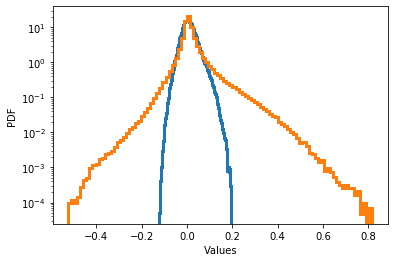

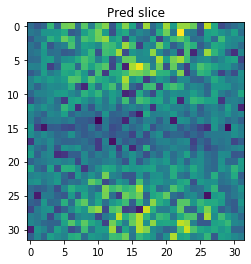

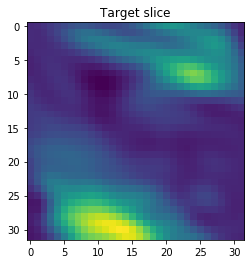

{'runtime': 2.038707971572876}

In [4]:
x, y = JHTDB128Dataset(path=dataset_root_dir,
                       features=['u', 'b', 'a',
                                'du0', 'du1', 'du2',
                                'db0', 'db1', 'db2',
                                'da0', 'da1', 'da2'],
                       labels=['tn'],
                       checkpoints=[0.01],
					   grid_size=GRID_SIZE).load()

model = Spacial3dEncoderNetworkEstimator(
    config=Spacial3dEncoderNetworkEstimatorConfiguration(n_epochs=1)
)


evaluation_experiment_name = "Evaluation experiment"
evaluation_experiment = EvaluationExperiment(name=evaluation_experiment_name,
											 backend=FakeExperimentBackend(evaluation_experiment_name),
											 model=training_experiment.model,
											 inputs=x, targets=y,
											 n_output_channels=3,
											 grid_size=GRID_SIZE)

evaluation_experiment.run()
